In [22]:
from torchvision.models import resnet101, ResNet101_Weights
from torchvision.datasets import ImageFolder
import torch
from torchmetrics import Accuracy, F1Score, Precision, Recall
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset, ConcatDataset
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

In [74]:
cdp_data = ImageFolder('../data_retrieval/CDP_data_other', ResNet101_Weights.IMAGENET1K_V2.transforms())


In [75]:
print("Length of test set:", len(cdp_data))

Length of test set: 825


In [76]:
model = resnet101()

In [109]:
dummy_model = resnet101(ResNet101_Weights.IMAGENET1K_V2)

e:\Anaconda\envs\Babylon\Lib\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(


In [110]:
for param in dummy_model.parameters():
    param.requires_grad = False

In [111]:
import torch.nn as nn
num_classes = 28  # Replace with the number of classes in your specific task
custom_classifier = nn.Sequential(
    nn.Linear(dummy_model.fc.in_features, 512),  # You can adjust the number of neurons in the new layer
    nn.ReLU(),
    nn.Linear(512, num_classes)  # Output layer with num_classes output units
)

In [112]:
dummy_model.fc = custom_classifier

In [77]:
model.load_state_dict(torch.load('../models/models_weights/resnet101_similar_signs_1epoch.pth'))

<All keys matched successfully>

In [78]:
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [99]:
test_loader = torch.utils.data.DataLoader(cdp_data,
                                             batch_size=16, shuffle=True,
                                             num_workers=4)

In [100]:
print("Size of test dataset:", len(cdp_data))

Size of test dataset: 825


In [101]:
idx_to_class = {v: k for k, v in cdp_data.class_to_idx.items()}

In [102]:
idx_to_class

{0: 'AN_Neo-Assyrian',
 1: 'AN_Neo-Babylonian',
 2: 'A_Neo-Assyrian',
 3: 'A_Neo-Babylonian',
 4: 'AŠ_Neo-Assyrian',
 5: 'AŠ_Neo-Babylonian',
 6: 'BAD_Neo-Assyrian',
 7: 'BAD_Neo-Babylonian',
 8: 'DIŠ_Neo-Assyrian',
 9: 'DIŠ_Neo-Babylonian',
 10: 'GIŠ_Neo-Assyrian',
 11: 'GIŠ_Neo-Babylonian',
 12: 'IGI_Neo-Assyrian',
 13: 'IGI_Neo-Babylonian',
 14: 'I_Neo-Assyrian',
 15: 'I_Neo-Babylonian',
 16: 'MA_Neo-Assyrian',
 17: 'MA_Neo-Babylonian',
 18: 'MU_Neo-Assyrian',
 19: 'MU_Neo-Babylonian',
 20: 'NA_Neo-Assyrian',
 21: 'NA_Neo-Babylonian',
 22: 'NU_Neo-Assyrian',
 23: 'NU_Neo-Babylonian',
 24: 'UD_Neo-Assyrian',
 25: 'UD_Neo-Babylonian',
 26: 'ŠU₂_Neo-Assyrian',
 27: 'ŠU₂_Neo-Babylonian'}

In [83]:
from collections import Counter
amount_of_samples = Counter()
for image, label in cdp_data:
    amount_of_samples[idx_to_class[label]]+=1


In [84]:
print(set(amount_of_samples))

{'I_Neo-Babylonian', 'AN_Neo-Assyrian', 'GIŠ_Neo-Babylonian', 'MA_Neo-Babylonian', 'MU_Neo-Babylonian', 'DIŠ_Neo-Assyrian', 'NA_Neo-Assyrian', 'A_Neo-Babylonian', 'AŠ_Neo-Babylonian', 'MA_Neo-Assyrian', 'A_Neo-Assyrian', 'UD_Neo-Assyrian', 'I_Neo-Assyrian', 'UD_Neo-Babylonian', 'NU_Neo-Assyrian', 'NU_Neo-Babylonian', 'IGI_Neo-Babylonian', 'NA_Neo-Babylonian', 'IGI_Neo-Assyrian', 'MU_Neo-Assyrian', 'DIŠ_Neo-Babylonian', 'ŠU₂_Neo-Babylonian', 'AŠ_Neo-Assyrian', 'BAD_Neo-Babylonian', 'ŠU₂_Neo-Assyrian', 'BAD_Neo-Assyrian', 'GIŠ_Neo-Assyrian', 'AN_Neo-Babylonian'}


In [85]:
class_counts = dict(sorted({label: amount_of_samples[label] for label in set(amount_of_samples)}.items(), key=lambda x: x[1], reverse=True))

In [86]:
class_counts

{'A_Neo-Assyrian': 91,
 'AN_Neo-Assyrian': 52,
 'MU_Neo-Babylonian': 47,
 'A_Neo-Babylonian': 45,
 'MA_Neo-Babylonian': 43,
 'I_Neo-Assyrian': 43,
 'NU_Neo-Assyrian': 41,
 'MA_Neo-Assyrian': 40,
 'UD_Neo-Assyrian': 40,
 'AN_Neo-Babylonian': 39,
 'AŠ_Neo-Assyrian': 38,
 'MU_Neo-Assyrian': 36,
 'ŠU₂_Neo-Assyrian': 28,
 'UD_Neo-Babylonian': 26,
 'IGI_Neo-Assyrian': 24,
 'IGI_Neo-Babylonian': 22,
 'DIŠ_Neo-Assyrian': 21,
 'NU_Neo-Babylonian': 21,
 'GIŠ_Neo-Assyrian': 20,
 'BAD_Neo-Assyrian': 18,
 'ŠU₂_Neo-Babylonian': 17,
 'I_Neo-Babylonian': 16,
 'BAD_Neo-Babylonian': 16,
 'GIŠ_Neo-Babylonian': 14,
 'DIŠ_Neo-Babylonian': 13,
 'AŠ_Neo-Babylonian': 12,
 'NA_Neo-Assyrian': 1,
 'NA_Neo-Babylonian': 1}

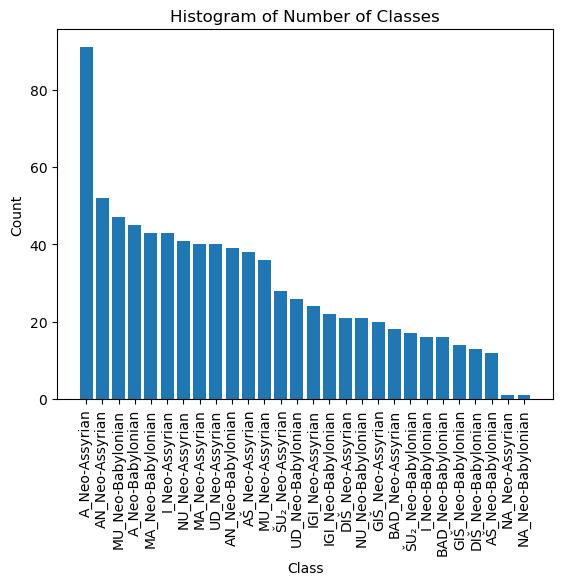

In [87]:
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Histogram of Number of Classes')
plt.xticks(rotation=90)
plt.show()

In [113]:
correct_pred = {classname: 0 for classname in idx_to_class}
total_pred = {classname: 0 for classname in idx_to_class}
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = dummy_model(images)
        _, predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels, predictions):
            if idx_to_class[int(label)] == idx_to_class[(int(prediction))]:
                correct_pred[int(label)] += 1
            total_pred[int(label)] += 1

In [114]:
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {idx_to_class[classname]:5s} is {accuracy:.1f} %')

Accuracy for class: AN_Neo-Assyrian is 1.9 %
Accuracy for class: AN_Neo-Babylonian is 2.6 %
Accuracy for class: A_Neo-Assyrian is 0.0 %
Accuracy for class: A_Neo-Babylonian is 0.0 %
Accuracy for class: AŠ_Neo-Assyrian is 0.0 %
Accuracy for class: AŠ_Neo-Babylonian is 0.0 %
Accuracy for class: BAD_Neo-Assyrian is 0.0 %
Accuracy for class: BAD_Neo-Babylonian is 31.2 %
Accuracy for class: DIŠ_Neo-Assyrian is 0.0 %
Accuracy for class: DIŠ_Neo-Babylonian is 0.0 %
Accuracy for class: GIŠ_Neo-Assyrian is 5.0 %
Accuracy for class: GIŠ_Neo-Babylonian is 0.0 %
Accuracy for class: IGI_Neo-Assyrian is 0.0 %
Accuracy for class: IGI_Neo-Babylonian is 0.0 %
Accuracy for class: I_Neo-Assyrian is 0.0 %
Accuracy for class: I_Neo-Babylonian is 0.0 %
Accuracy for class: MA_Neo-Assyrian is 20.0 %
Accuracy for class: MA_Neo-Babylonian is 0.0 %
Accuracy for class: MU_Neo-Assyrian is 2.8 %
Accuracy for class: MU_Neo-Babylonian is 6.4 %
Accuracy for class: NA_Neo-Assyrian is 0.0 %
Accuracy for class: NA_Neo-Ba

In [115]:
print("Overall accuracy: ",sum(correct_pred.values()) / sum(total_pred.values()))

Overall accuracy:  0.037575757575757575


In [124]:
true_values = torch.zeros(len(cdp_data), dtype=torch.int64)
preds = torch.zeros(len(cdp_data), 28)
counter = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = dummy_model(images)
        for pred,label  in zip(outputs, labels):
            preds[counter] = pred
            true_values[counter] = int(label)
            counter += 1
            

In [125]:
accuracy_2 = Accuracy('multiclass', num_classes=28, top_k=2)
accuracy_3 = Accuracy('multiclass', num_classes=28, top_k=3)
top_2 = accuracy_2(preds, true_values)
top_3 = accuracy_3(preds, true_values)
print("Overall Top-2 accuracy: ",float(top_2))
print("Overall Top-3 accuracy: ",float(top_3))

Overall Top-2 accuracy:  0.072727270424366
Overall Top-3 accuracy:  0.10424242168664932


In [126]:
cf_matrix = confusion_matrix(true_values, torch.max(preds,1)[1])
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [idx_to_class[i] for i in idx_to_class],
                    columns = [idx_to_class[i] for i in idx_to_class])

<Axes: >

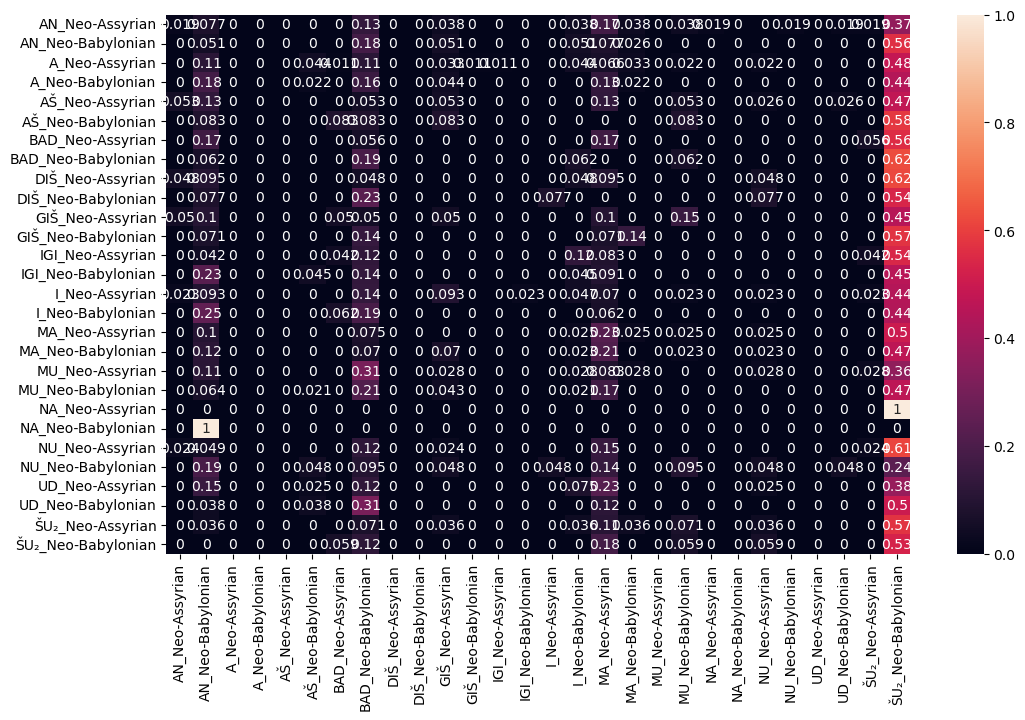

In [127]:
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)

In [30]:
precision = Precision('multiclass',num_classes=28,average='none')

In [31]:
precision_each_class = precision(torch.max(preds,1)[1], true_values)

In [32]:
print(precision_each_class)

tensor([0.8545, 0.8226, 1.0000, 0.9671, 0.6444, 0.8969, 0.8400, 0.8302, 0.8197,
        0.9286, 0.7209, 0.7222, 0.9091, 0.9355, 0.8947, 0.8588, 0.9318, 0.9341,
        0.8966, 0.9000, 0.9167, 0.9582, 0.7407, 0.8732, 0.9167, 0.9113, 0.8438,
        0.7917])
